In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm, t
import scipy
from matplotlib import rc
import warnings

warnings.filterwarnings('ignore')


rc('font',family='Malgun Gothic')  # 한글 폰트 설정
plt.rcParams['axes.unicode_minus'] = False # 마이너스 부호 출력 설정

### 과제

t 분포 확률밀도 함수를 그래프로 그리고 그 위에 t_value와 임계값을 vline으로 표시하세요.

In [2]:
sample_data = np.array([10.8, 9.5, 11.2, 10.5, 11.3, 10.7, 10.9, 9.8, 11.0, 10.4])

np.random.seed(0)

mu = 10
alpha = 0.05
sample_mean = np.mean(sample_data)
sample_std = np.std(sample_data, ddof = 1)
df = len(sample_data) - 1 

t_value = (sample_mean - mu) / (sample_std / np.sqrt(len(sample_data))) # 표본 개수가 적을때
t_crit1 = stats.t.ppf(alpha / 2, df)
t_crit2 = stats.t.ppf(1 - alpha / 2, df)
p_value = stats.t.sf(abs(t_value), df) * 2

print('표본평균 : ', sample_mean)
print('표본표준편차 : ', sample_std)
print('t-값 : ', t_value)
print('임계값 : ', t_crit1, t_crit2)
print('p_value : ', p_value)


표본평균 :  10.610000000000001
표본표준편차 :  0.5820461990063828
t-값 :  3.3141516532462774
임계값 :  -2.262157162740992 2.2621571627409915
p_value :  0.009024007157468749


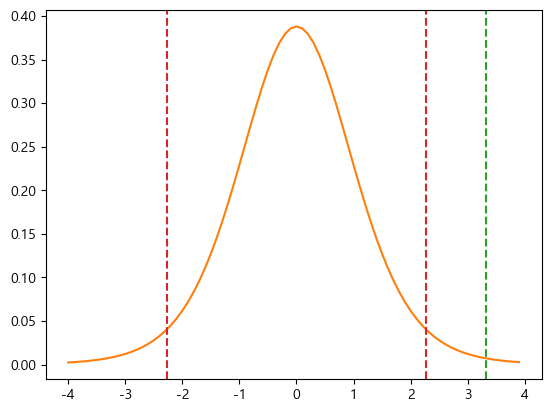

In [3]:
x_plot = np.arange(-4, 4, 0.1)

plt.plot(x_plot, stats.t.pdf(x = x_plot, loc = 0, scale = 1, df = df), color = 'C1')

plt.axvline(t_value, color = 'C2', linestyle = '--')
plt.axvline(t_crit1, color = 'C3', linestyle = '--')
plt.axvline(t_crit2, color = 'C3', linestyle = '--')

plt.show()

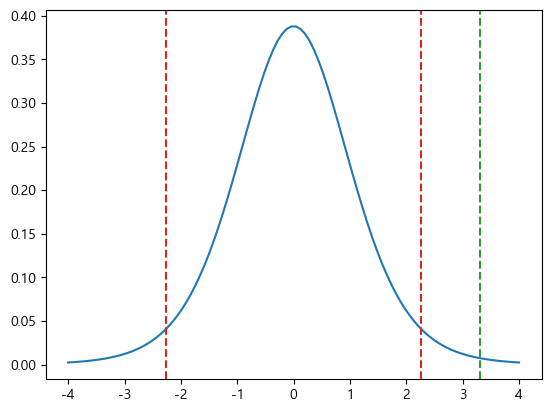

In [4]:
t_dist = stats.t(df)
x = np.linspace(-4, 4, 100)
y = t_dist.pdf(x)

plt.plot(x, y, label = 't-분포')
plt.axvline(t_value, color = 'C2', linestyle = '--')
plt.axvline(t_crit1, color = 'C3', linestyle = '--')
plt.axvline(t_crit2, color = 'C3', linestyle = '--')

plt.show()

#### 대응표본 t-검정(Paired samples t-test) 
동일한 개체나 집단에서, 두 조건의 차이에 대한 검정 방법입니다. 
예를 들어, 특정 약의 효과를 검증하기 위해, 약을 복용하기 전과 후의 체온을 측정한 경우에 대응표본 t-검정을 사용할 수 있습니다.

In [5]:
pt_data = pd.read_csv('../dataset/dataset_base/5_9_ptt.csv')

pt_data.head()

,person,medicine,body_temperature
0,A,before,36.2
1,B,before,36.2
2,C,before,35.3
3,D,before,36.1
4,E,before,36.1


In [6]:
pt_data.medicine.value_counts()

before    5
after     5
Name: medicine, dtype: int64

In [7]:
before = pt_data[pt_data.medicine == 'before']['body_temperature']
after = pt_data.query('medicine == "after"')['body_temperature'] #query 함수 사용시

print(before, '\n')
print(after, '\n')

# 배열로 변환

before = np.array(before)
after = np.array(after)

diff = after - before

print(diff, '\n')

0    36.2
1    36.2
2    35.3
3    36.1
4    36.1
Name: body_temperature, dtype: float64 

5    36.8
6    36.1
7    36.8
8    37.1
9    36.9
Name: body_temperature, dtype: float64 

[ 0.6 -0.1  1.5  1.   0.8] 



In [8]:
# 평균값이 0과 다르지 검정

stats.ttest_1samp(diff, 0) # 검정하려는 데이터, 모평균 주어진값 -> 검정통계량과 p값을 출력

#유의확율 0.05 보다 작으므로 귀무가설을 기각, 통계적으로 유의미한 차이가 있다고 주장 가능

TtestResult(statistic=2.901693483620596, pvalue=0.044043109730074276, df=4)

#### 독립표본 t-검정(Independent samples t-test)
두 개의 독립된 집단에서, 각 집단의 평균 차이가 유의한지를 검정하는 방법입니다. 예를 들어, 남자와 여자의 평균 키를 비교하는 경우에 독립표본 t-검정을 사용할 수 있습니다.

In [9]:
# 평균

mean_bf = np.mean(before)
mean_af = np.mean(after)

# 분산

sigma_bf = np.var(before, ddof = 1)
sigma_af = np.var(after, ddof = 1)


# 샘플 사이즈

n1 = len(before)
n2 = len(after)

# t값

t_value = (mean_af - mean_bf) / np.sqrt(sigma_bf / n1 + sigma_af / n2)

print(t_value)


3.1557282344421034


In [10]:
# equal_var = False : 분산이 같지 않음을 가정한 t 검정(welch 검정)
# p값이 유의확률 보다 작으므로 귀무가설 기각, 통계적으로 유의미한 차이가 있다고 주장 가능

stats.ttest_ind(after, before, equal_var = False)

Ttest_indResult(statistic=3.1557282344421034, pvalue=0.013484775682079892)

### 과제

동일한 집단에 대해서 약 복용 전과 후의 체온에 변화가 있는지에 대한 유의성 검정을 수행하세요.

- 약 복용 전 체온 데이터 : [36.2, 36.1, 36.5, 36.3, 36.2, 36.4, 36.3, 36.1, 36.6, 36.2]
- 약 복용 후 체온 데이터 : [36.5, 36.3, 36.8, 36.6, 36.5, 36.7, 36.6, 36.2, 36.9, 36.4]

In [11]:
x1 = [36.2, 36.1, 36.5, 36.3, 36.2, 36.4, 36.3, 36.1, 36.6, 36.2]
x2 = [36.5, 36.3, 36.8, 36.6, 36.5, 36.7, 36.6, 36.2, 36.9, 36.4]

x1_mean = np.mean(x1)
x2_mean = np.mean(x2)

x1_var = np.var(x1, ddof = 1)
x2_var = np.var(x2, ddof = 1)

n1 = len(x1)
n2 = len(x2)

t_value = (x2_mean - x1_mean) / np.sqrt(x1_var / n1 + x2_var / n2)
t_crit = stats.t.ppf(alpha / 2, df), stats.t.ppf(1-alpha / 2, df)

print(t_value)
print(t_crit)

3.00444774150815
(-2.262157162740992, 2.2621571627409915)


In [12]:
diff = np.array(x2) - np.array(x1)
diff_mean = np.mean(diff)

std = np.sqrt(np.sum((diff - diff_mean) ** 2) / (len(diff) - 1))
std = np.std(diff, ddof = 1)

se = std / np.sqrt(len(diff))
df = len(diff) - 1

t_value = diff_mean / se
t_crit = stats.t.ppf(alpha / 2, df), stats.t.ppf(1 - alpha / 2, df)

print(t_value)
print(t_crit)

11.758942438532666
(-2.262157162740992, 2.2621571627409915)


In [13]:
stats.ttest_rel(x2, x1)

# 유의확률 보다 작으므로 귀무가설 기각, 통계적으로 유의미한 차이가 있음을 주장 가능

TtestResult(statistic=11.758942438532666, pvalue=9.15111121564323e-07, df=9)

In [14]:
t_statistic, p_value = stats.ttest_rel(x1, x2)

alpha = 0.05

print(t_statistic)
print(p_value)

if p_value < alpha :
    print('효과가 있다')

else :
    print('효과가 없다')

-11.758942438532666
9.15111121564323e-07
효과가 있다


### 과제
남자와 여자 두 그룹에 대해서 평균 키의 차이가 있는지에 대한 유의성 검정을 수행하세요.
- 남자의 키 데이터 : [172, 174, 176, 178, 180, 182, 184, 186, 188, 190]
- 여자의 키 데이터 : [156, 158, 160, 162, 164, 166, 168, 170, 172, 174]

In [15]:
m = [172, 174, 176, 178, 180, 182, 184, 186, 188, 190]
w = [156, 158, 160, 162, 164, 166, 168, 170, 172, 174]

m_mean = np.mean(m)
w_mean = np.mean(w)

m_var = np.var(m, ddof = 1)
w_var = np.var(w, ddof = 1)

n1 = len(m)
n2 = len(w)

t_value = (m_mean - w_mean) / np.sqrt(m_var / n1 + w_var / n2)

print(t_value)

5.908391567007971


In [16]:
stats.ttest_ind(m, w, equal_var = False)

# 유의확률 보다 작으므로 귀무가설 기각, 통계적으로 유의미한 차이가 있음을 주장 가능

Ttest_indResult(statistic=5.90839156700797, pvalue=1.3603112478171794e-05)

### 카이제곱 분포
- 분산분석이나 독립성 검정 등에서 사용되는 확률분포입니다. 카이제곱 분포는 자유도(degree of freedom)에 따라 모양이 달라지며, 자유도가 클수록 정규분포에 가까워집니다.

- 독립성 검정에서 카이스퀘어 분포를 사용하는 이유는 검정통계량으로서 카이스퀘어 검정통계량을 사용하기 때문입니다.

- 독립성 검정은 두 범주형 변수 간의 관련성을 검정하는 방법입니다. 예를 들어, 성별과 흡연 여부라는 두 가지 범주형 변수가 있을 때, 이 두 변수 간에는 관련성이 있는지 없는지를 검정하는 것입니다.

- 카이스퀘어 검정통계량은 범주형 변수 간의 관련성을 검정하는 데 사용되며, 관측된 빈도와 기대 빈도 간의 차이를 이용하여 검정통계량을 계산합니다. 검정통계량은 카이스퀘어 분포를 따르므로, 카이스퀘어 분포를 이용하여 유의확률을 계산합니다. 이 때, 검정통계량이 카이스퀘어 분포를 따르는 것은 큰 표본에서는 중심극한정리에 의해, 작은 표본에서는 피셔의 정확 검정에 의해 유도됩니다.

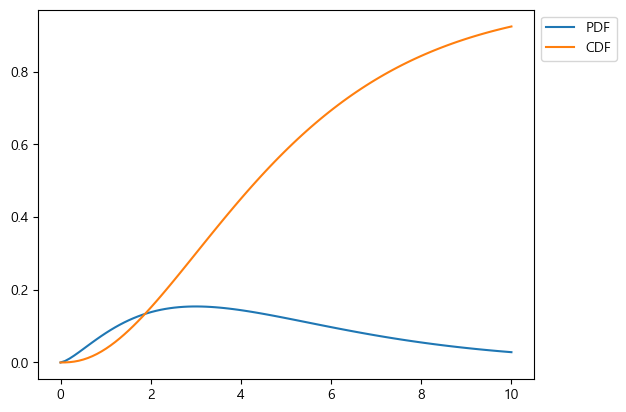

In [17]:
x = np.linspace(0, 10, 100)

df = 5

# 카이제곱 분포의 확률밀도 함수 그래프

pdf = stats.chi2.pdf(x, df)

plt.plot(x, pdf, label = 'PDF')

# 카이제곱 분포의 누적 확률밀도 함수 그래프

cdf = stats.chi2.cdf(x, df)

plt.plot(x, cdf, label = 'CDF')

plt.legend(bbox_to_anchor = (1, 1), loc = 'upper left')

plt.show()

### 독립성 검정
- 독립성 검정은 두 개의 범주형 변수 간의 상관 관계를 검정하는 방법입니다. 독립성 검정에서는 귀무가설로 두 변수가 서로 독립적이라는 가정을 놓고, 대립가설로 두 변수가 서로 상관 관계가 있다는 가정을 놓습니다. 검정 결과로는 유의확률이 출력되며, 유의확률이 유의수준보다 작을 경우 귀무가설을 기각하고 대립가설을 채택합니다.

- 독립성 검정에서는 검정통계량으로 카이제곱 검정통계량을 사용합니다. 검정통계량을 계산하기 위해 교차표(cross table)을 생성하고, 이를 바탕으로 관측값과 기대값의 차이를 계산합니다. 교차표는 각 범주형 변수의 카테고리를 축으로 하는 표입니다. 예를 들어, 성별과 흡연 여부라는 두 범주형 변수 간의 독립성을 검정하는 경우, 교차표는 성별을 행으로, 흡연 여부를 열로 나열한 표입니다.

- 검정 결과로는 검정통계량과 유의확률이 출력되며, 유의확률이 유의수준보다 작으면 귀무가설을 기각하고 대립가설을 채택합니다. 따라서, 독립성 검정 결과를 해석할 때에는 유의수준을 고려하여 검정 결과를 해석해야 합니다.

In [18]:
# 교차표 생성

observed = [[10, 20], [30, 40]]

# 카이제곱 검정 실행

chi2_stat, p_value, dof, expected = stats.chi2_contingency(observed)

print('카이제곱 검정 통계량 : ', chi2_stat)
print('p_value : ', p_value)
print('자유도 : ', dof)
print('기대빈도 : ', '\n', expected)

카이제곱 검정 통계량 :  0.4464285714285714
p_value :  0.5040358664525046
자유도 :  1
기대빈도 :  
 [[12. 18.]
 [28. 42.]]


In [19]:
click_data = pd.read_csv('../dataset/dataset_base/5_10_cd.csv')
click_data

,color,click,freq
0,blue,click,20
1,blue,not,230
2,red,click,10
3,red,not,40


In [20]:
# 분할표

cross = pd.pivot_table(data = click_data, values = 'freq', aggfunc = 'sum', index = 'color', columns = 'click')

cross

click,click,not
color,,
blue,20,230
red,10,40


In [21]:
# 통계량 p값 자유도 기대도수표
# 유의확률 귀무가설을 기각 통계적으로 유의미한 차이가 있다고 주장 가능

stats.chi2_contingency(cross, correction = False) # 보정 안함

Chi2ContingencyResult(statistic=6.666666666666666, pvalue=0.009823274507519247, dof=1, expected_freq=array([[ 25., 225.],
       [  5.,  45.]]))

### 과제

아래 df 에서 gender 와 purchase간 독립성 검정을 수행하고 그 결과를 기술하세요


In [22]:
import pandas as pd
from scipy.stats import chi2_contingency
# 귀무가설로 두 변수가 서로 독립적이라는 가정
# 데이터 프레임 생성
data = {'gender': ['M', 'M', 'F', 'F', 'F', 'M', 'M', 'F', 'M', 'M'],
        'purchase': ['yes', 'yes', 'no', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes']}
df = pd.DataFrame(data)
df.head()

,gender,purchase
0,M,yes
1,M,yes
2,F,no
3,F,yes
4,F,no


In [23]:
df.gender.replace({'M' : 0, 'F' : 1}, inplace = True)
df.purchase.replace({'no' : 0, 'yes' : 1}, inplace = True)


pdf = stats.chi2.pdf(df['gender'], df['purchase'])

chi2_stat, p_value, dof, expected = chi2_contingency(pdf)

print('카이제곱 검정 통계량 : ', chi2_stat)
print('p_value : ', p_value)
print('자유도 : ', dof)
print('기대빈도 : ', '\n', expected)

카이제곱 검정 통계량 :  0.0
p_value :  1.0
자유도 :  0
기대빈도 :  
 [       inf        inf        nan 0.24197072        nan        inf
        nan        nan        nan        inf]


In [24]:
cont_table = pd.crosstab(df['gender'], df['purchase'])

print(cont_table, '\n')

chi2_stat, p_value, dof, expected = chi2_contingency(cont_table)

print('카이제곱 검정 통계량 : ', chi2_stat)
print('p_value : ', p_value)
print('자유도 : ', dof)
print('기대빈도 : ', expected)

purchase  0  1
gender        
0         2  4
1         3  1 

카이제곱 검정 통계량 :  0.41666666666666663
p_value :  0.5186050164287255
자유도 :  1
기대빈도 :  [[3. 3.]
 [2. 2.]]
